# How Rain Affects Travel Time: A Taxi Ride Analysis from the Loop to O’Hare

## Introduction
In this project, I analyzed taxi ride data to explore whether trips from Chicago’s Loop to O’Hare Airport take longer on rainy Saturdays compared to dry ones. Rainy conditions often lead to reduced visibility and slippery roads, which can affect driving times. Understanding this relationship can help travelers and service providers plan better for weather-related delays.

The dataset was provided through the TripleTen learning platform and includes ride, company, and weather data from November 2017. This project was completed in a Jupyter Notebook environment within the platform. Because the original datasets are not publicly available, the notebook includes preserved outputs but may not run outside the original environment.

In [1]:
# import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#load and examine data
companies_data = pd.read_csv('/datasets/project_sql_result_01.csv')
companies_data.info()
companies_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [3]:
#check for duplicates
print(f"Number of duplicates in companies_data: {companies_data.duplicated().sum()}")
# drop duplicates
companies_data = companies_data.drop_duplicates()

Number of duplicates in companies_data: 0


In [4]:
#load and examine data
dropoff_data = pd.read_csv('/datasets/project_sql_result_04.csv')
dropoff_data.info()
dropoff_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [5]:
#check for duplicates
print(f"Number of duplicates in dropoff_data: {dropoff_data.duplicated().sum()}")
# drop duplicates
dropoff_data = dropoff_data.drop_duplicates()

Number of duplicates in dropoff_data: 0


In [6]:
top_neighborhoods = dropoff_data.sort_values(by='average_trips', ascending=False).head(10)

In [7]:
#display top 10 neighborhoods
top_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [ ]:

display(top_neighborhoods.head(3))

top_neighborhoods.tail(3)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667


,dropoff_location_name,average_trips
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


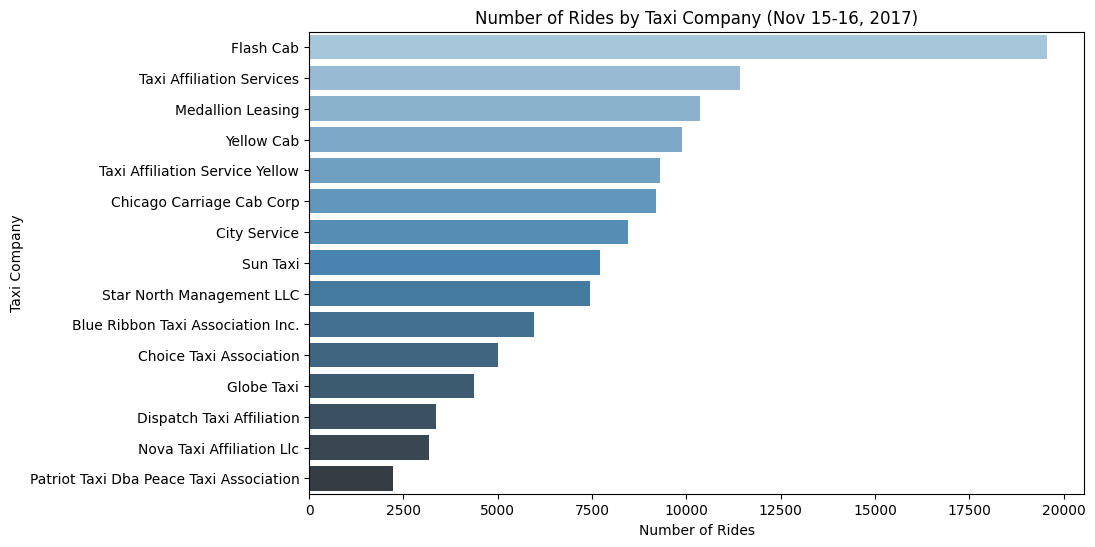

In [9]:
companies_data_sorted = companies_data.sort_values(by='trips_amount', ascending=False).head(15)

# Plot taxi companies and number of rides
plt.figure(figsize=(10, len(companies_data_sorted) * 0.4))
sns.barplot(data=companies_data_sorted, x='trips_amount', y='company_name', palette="Blues_d")
plt.title('Number of Rides by Taxi Company (Nov 15-16, 2017)')
plt.xlabel('Number of Rides')
plt.ylabel('Taxi Company')
plt.show()

Of the 64 companies shown, only a few dominated the market with a far greater share of rides. There were many companies with only a small number if rides, possibly because of different resources and niche routes. 

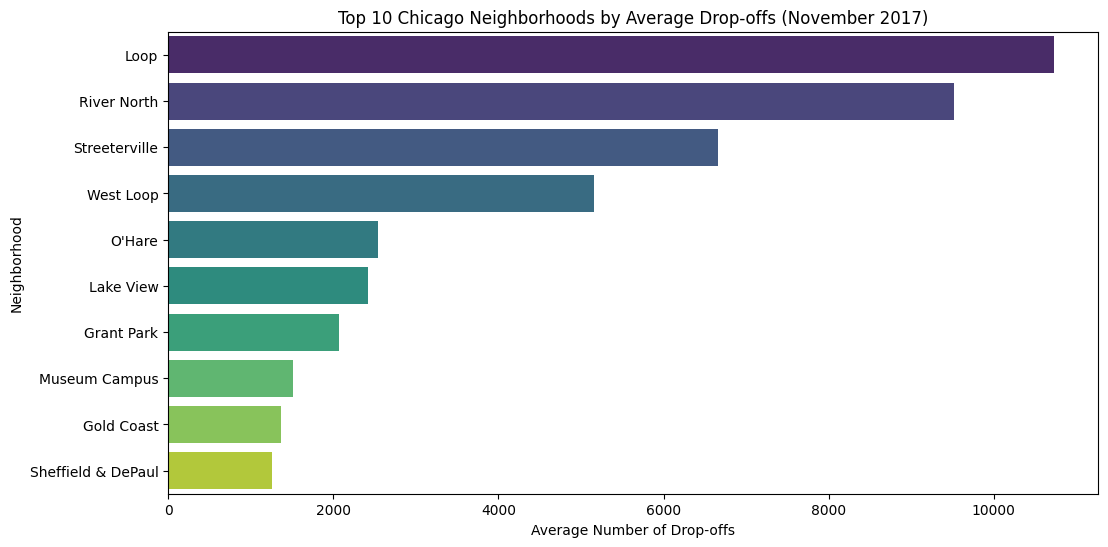

In [10]:
# Plot top 10 neighborhoods by average drop-offs
plt.figure(figsize=(12, 6))
sns.barplot(data=top_neighborhoods, x='average_trips', y='dropoff_location_name', palette="viridis")
plt.title('Top 10 Chicago Neighborhoods by Average Drop-offs (November 2017)')
plt.xlabel('Average Number of Drop-offs')
plt.ylabel('Neighborhood')
plt.show()

The top 10 neighborhoods for taxi drop-offs are mostly busy areas like the Loop, River North, and Streeterville. This shows that people need taxis most in busier urban areas. 

In [11]:
#load data with automatic datetime parsing and examine 
rides_weather = pd.read_csv('/datasets/project_sql_result_07.csv', parse_dates=['start_ts'])
rides_weather.info()
rides_weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [12]:
# Display duplicate rows, if any
duplicate_rows = rides_weather[rides_weather.duplicated()]
duplicate_rows


,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


In [13]:
#drop duplicates
rides_weather = rides_weather.drop_duplicates()


In [14]:
# Display duplicate rows, if any
duplicate_rows = rides_weather[rides_weather.duplicated()]
duplicate_rows


,start_ts,weather_conditions,duration_seconds


Hypothesis to test: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

Null Hypothesis (HO): The average duration of rides from the Loop to O'Hare on rainy Saturdays is the same as on non-rainy Saturdays.

Alternate Hypothesis (H1): The average duration of rides from the Loop to O'Hare on rainy Saturdays is different from that on non-rainy Saturdays.

In [15]:
print("Unique weather conditions:", rides_weather['weather_conditions'].unique())

Unique weather conditions: ['Good' 'Bad']


In [16]:
# Filter for rides that occurred on Saturdays
rides_weather['day_of_week'] = rides_weather['start_ts'].dt.day_name()
saturday_data = rides_weather[rides_weather['day_of_week'] == 'Saturday']

# Split data into rainy and non-rainy Saturdays
rainy_saturday_data = saturday_data[saturday_data['weather_conditions'] == 'Bad']
non_rainy_saturday_data = saturday_data[saturday_data['weather_conditions'] == 'Good']

# Extract ride durations for both groups
rainy_durations = rainy_saturday_data['duration_seconds']
non_rainy_durations = non_rainy_saturday_data['duration_seconds']



In [17]:
# Check if either group is empty or contains identical values
print("Rainy Saturday durations count:", len(rainy_durations))
print("Non-rainy Saturday durations count:", len(non_rainy_durations))

print("Rainy Saturday durations summary:\n", rainy_durations.describe())
print("Non-rainy Saturday durations summary:\n", non_rainy_durations.describe())


Rainy Saturday durations count: 148
Non-rainy Saturday durations count: 723
Rainy Saturday durations summary:
 count     148.000000
mean     2409.229730
std       751.544705
min       480.000000
25%      1746.000000
50%      2463.500000
75%      2940.000000
max      4980.000000
Name: duration_seconds, dtype: float64
Non-rainy Saturday durations summary:
 count     723.000000
mean     2032.253112
std       773.444860
min         0.000000
25%      1435.500000
50%      1883.000000
75%      2491.500000
max      7440.000000
Name: duration_seconds, dtype: float64


Note that the average ride duration on rainy Saturdays is 377 seconds (6.28 minutes) longer. 

In [18]:
# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(rainy_durations, non_rainy_durations, equal_var=False)

# Set significance level
alpha = 0.05

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: The average duration of rides differs on rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average ride duration on rainy Saturdays.")


T-statistic: 5.531968188074177
P-value: 9.126383933880083e-08
Reject the null hypothesis: The average duration of rides differs on rainy Saturdays.


The t-test results lead us to reject the null hypothesis, suggesting that rain does affect the average ride duration on Saturdays.

## Conclusion
This project analyzed Chicago taxi data to uncover patterns in company activity, popular drop-off neighborhoods, and the effect of weather on ride duration to O’Hare Airport. The findings show that a small number of companies dominate the market and that drop-offs cluster in high-traffic areas like the Loop and River North. Most notably, rides to the airport were significantly longer on rainy Saturdays, confirming that weather plays a measurable role in travel time. These insights could help both riders and transit planners better prepare for weather-related delays.